In [28]:
from typing import TypedDict
from langgraph.graph import StateGraph
import numpy as np

In [29]:
class AgentState(TypedDict):
    values : list[int]
    result : str
    name: str

In [30]:
def process(state:AgentState)->AgentState:
    name = state['name']
    values = state['values']
    total = np.sum(values)

    state['result'] = f"Hi {name}, values are {values}, your sum is {total}"
    return state

In [31]:
graph = StateGraph(AgentState)

graph.add_node("processor",process)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

In [32]:
result = app.invoke({"name" : "xqz" , "values":[1,2,3,4]})

In [33]:
result

{'values': [1, 2, 3, 4],
 'result': 'Hi xqz, values are [1, 2, 3, 4], your sum is 10',
 'name': 'xqz'}

In [34]:
result['result']

'Hi xqz, values are [1, 2, 3, 4], your sum is 10'

## Exercise 2 
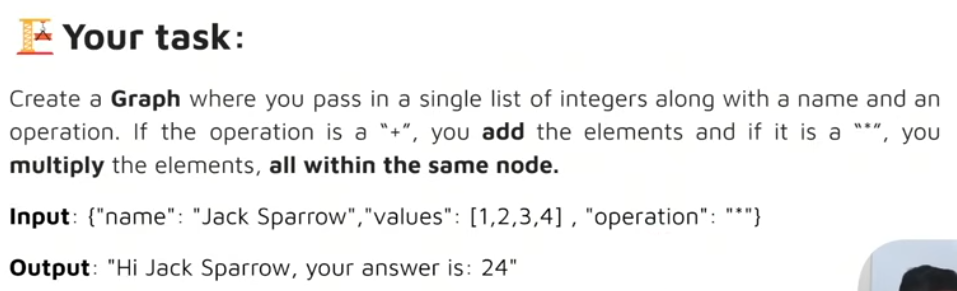

In [35]:
class AgentState(TypedDict):
    operation : str
    name : str
    result : str
    values : list[int]

In [36]:
def process(state:AgentState)->AgentState:
    op = state['operation']
    name = state['name']
    vector = state['values']
    output = 1
    if(op=='+'):
        output = np.sum(vector)
    else :
        for num in vector :
            output = output * num

    state['result'] = f"Hi {name} , your answer is : {output}"
    return state

In [38]:
graph = StateGraph(AgentState)
graph.add_node("processor",process)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

In [41]:
result1 = app.invoke({"name":"xqz","values":[1,2,3,4],"operation":"+"})
result2 = app.invoke({"name":"xqz","values":[1,2,3,4],"operation":"*"})

In [44]:
result1['result']

'Hi xqz , your answer is : 10'

In [45]:
result2['result']

'Hi xqz , your answer is : 24'